<a href="https://colab.research.google.com/github/oudeng/Epidemic_Models/blob/master/Intc_SEIRAH_SW_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

city_ 0 [1351997, 0, 3, 0, 0, 0]
city_ 1 [919998, 0, 1, 0, 1, 0]
city_ 2 [733997, 1, 2, 0, 0, 0]
city_ 3 [628000, 0, 0, 0, 0, 0]
day: 0 Total [3633992       1       6       0       1       0]

city_ 0 [1351997, 0, 3, 0, 0, 0]
city_ 1 [919998, 0, 0, 0, 1, 1]
city_ 2 [733997, 1, 2, 0, 0, 0]
city_ 3 [628000, 0, 0, 0, 0, 0]
day: 1 Total [3633992       1       5       0       1       1]

city_ 0 [1351997, 0, 3, 0, 0, 0]
city_ 1 [919998, 0, 0, 0, 1, 1]
city_ 2 [733997, 1, 2, 0, 0, 0]
city_ 3 [628000, 0, 0, 0, 0, 0]
day: 2 Total [3633992       1       5       0       1       1]

city_ 0 [1351997, 0, 3, 0, 0, 0]
city_ 1 [919998, 0, 0, 0, 1, 1]
city_ 2 [733997, 0, 3, 0, 0, 0]
city_ 3 [628000, 0, 0, 0, 0, 0]
day: 3 Total [3633992       0       6       0       1       1]

city_ 0 [1351997, 0, 3, 0, 0, 0]
city_ 1 [919998, 0, 0, 0, 1, 1]
city_ 2 [733997, 0, 3, 0, 0, 0]
city_ 3 [628000, 0, 0, 0, 0, 0]
day: 4 Total [3633992       0       6       0       1       1]

city_ 0 [1351997, 0, 1, 0, 0, 2]
ci

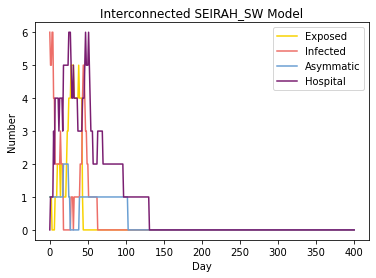

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on June,14 2020
Latest update on July,6 2020
@author: Ou, DENG.  dengou@toki.waseda.jp

Evironment: 
    Python 3.7
        networkx 2.4
        random 1.1.0
        matplotlib 3.1.3
    
ToDo list:
    (DONE)
    1. City_0,1,2,3 Generation and Initialization.
    2. H generated as Commuting people network with initial edge weight=1.
    3. Sample commuting people from city_* and copy 'status' to H.nodes.
    4. Change H.edges weight to 0 if nbr of H.nodes is 'status':'hosp'.
    5. Edge weight 0/1 function.
    6. SEIRSH_SW function.
    7. Status counting function.    
    8. Interconnected Nodes Mapping. 
        Interconnect_City2CBD() and Interconnect_CBD2City()
    9. Data output methods.
    10. Normal SEIRAH function
    11. Interconnected SEIRAH function
    12. Summarization
    13. Visualization
    14. Dig points and start paper.

"""
import networkx as nx
import random
from random import sample
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

'''
Network Generation and Initialization.
'''

def G_gene(N,k,p,expo,infe,asym,hosp,reco):
    G = nx.watts_strogatz_graph(N,k,p);  # G as WS model.
    
    for i in G.nodes():
        G.nodes[i]['status'] = 'susc'  #Initialize all nodes is susc.
        G.nodes[i]['S_1stday'] = 1  #Upgrade from about line64.
   
    for i in G.edges():
        G.edges[i]['weight'] = 1   #Initialize all edges weight = 1 
    
    """
    Initial G. SEIRAH status
    """
    samp_sum = expo+infe+asym+hosp+reco   #total number of samples

    
    # Random sample nodes from G.
    random_n = sample(G.nodes(), samp_sum)  #use sample function
    
    # nodes lists of each status. Randomly chose(clip) from random_n list.
    node_e = random_n[0:expo]
    node_i = random_n[expo:expo+infe]
    node_a = random_n[expo+infe:expo+infe+asym]
    node_h = random_n[expo+infe+asym:expo+infe+asym+hosp]
    node_r = random_n[expo+infe+asym+hosp:expo+infe+asym+hosp+reco]
    
    # Divide samples by status inputed numbers. Assign status except S.
    # Record *_1stday. S no need to record.
    for i in node_e:
        G.nodes[i]['status'] = 'expo'
        del G.nodes[i]['S_1stday']
        G.nodes[i]['E_1stday'] = 1
    
    for i in node_i:
        G.nodes[i]['status'] = 'infe'
        del G.nodes[i]['S_1stday']
        G.nodes[i]['I_1stday'] = 1
        
    for i in node_a:
        G.nodes[i]['status'] = 'asym'
        del G.nodes[i]['S_1stday']
        G.nodes[i]['A_1stday'] = 1
        
    for i in node_h:
        G.nodes[i]['status'] = 'hosp'
        del G.nodes[i]['S_1stday']
        G.nodes[i]['H_1stday'] = 1
    
    for i in node_r:
        G.nodes[i]['status'] = 'reco'
        del G.nodes[i]['S_1stday']
        G.nodes[i]['R_1stday'] = 1
        
    
    # update G edges weight. node_h needs update link weight 1=>0
    for i in node_h:
        for nbr in G[i]:
            G.edges[i, nbr]['weight'] = 0
            
#############################################################################            
    # Draw network for testing. Can rem it later. (Start here)
            
    # print(G.nodes.data())  #Output nodes data. Only for testing
    # print()
    # print(G.edges.data())  #Output edges data. Only for testing
       
    # ### Darw G. Only for testing
    # connecting = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 1]
    # disconnected = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 0]
    
    # pos = nx.circular_layout(G)  # positions for all nodes
    
    # # nodes
    # nx.draw_networkx_nodes(G, pos, node_size=300, node_color='#83C69F')
    # nx.draw_networkx_nodes(G, pos, nodelist=node_e, node_color='#F8D200')
    # nx.draw_networkx_nodes(G, pos, nodelist=node_i, node_color='#ED6E68')
    # nx.draw_networkx_nodes(G, pos, nodelist=node_a, node_color='#6A9FD3')
    # nx.draw_networkx_nodes(G, pos, nodelist=node_h, node_color='#7A1E71')
    # nx.draw_networkx_nodes(G, pos, nodelist=node_r, node_color='#009DAA')
    
    # # edges
    # nx.draw_networkx_edges(G, pos, edgelist=connecting, width=1)
    # nx.draw_networkx_edges(G, pos, edgelist=disconnected,
    #                         width=1, alpha=0.5, edge_color='black', style='dashed')
    
    # # labels
    # nx.draw_networkx_labels(G, pos, font_size=10, font_family='arial')
    
    # plt.axis('off')
    # plt.show()
            
    ### Draw network for testing. Can rem it later. (END here)
#############################################################################            
    
    return G  #necessary. Otherwise SEIRAH() error.
                #e.g. AttributeError: 'NoneType' object has no attribute 'nodes'

# For CBD, and TimeZone_Commuting
def edge_weight_0(nwk):
    for i in nwk.nodes():       
        if nwk.nodes[i]['status'] == 'hosp' or 'Com' in nwk.nodes[i]:
            for nbr in nwk[i]:
                nwk.edges[i, nbr]['weight'] = 0
            
    return nwk

# For Commuting people back TimeZone_Life
def edge_weight_1(nwk):
    for i in nwk.nodes():       
        if nwk.nodes[i]['status'] != 'hosp' or 'Com' in nwk.nodes[i]:
            for nbr in nwk[i]:
                nwk.edges[i, nbr]['weight'] = 1
            
    return nwk

'''
Interconnected Nodes Mapping.
'''
# Not in function. Shifted to main section.

'''
SEIRAH_SW function as below. Algorithm 2.
'''

def SEIRAH_SW(day,nwk,tau):
    
    for i in nwk.nodes():
 
        status_value = nwk.nodes[i]['status']
        
        if status_value == 'infe':
            # I infect S to E probabilistically
            threshold = 1 - beta[0]*tau
            for nbr in nwk[i]:
                probability = random.random()*nwk.edges[i,nbr]['weight']
                if nwk.nodes[nbr]['status'] == 'susc' and probability > threshold:
                    nwk.nodes[nbr]['status'] = 'expo'
                    nwk.nodes[nbr]['E_1stday'] = day
                    
            # I changes to H
            threshold = 1 - para_Epidemic['l_IH']*tau
            if random.random() > threshold:
                nwk.nodes[i]['status'] = 'hosp'
                nwk.nodes[i]['H_1stday'] = day
            
        if status_value == 'asym':            
            # A infect S to E probabilistically
            threshold = 1- beta[1]*tau
            for nbr in nwk[i]:
                probability = random.random()*nwk.edges[i,nbr]['weight']
                if nwk.nodes[nbr]['status'] == 'susc' and probability > threshold:
                    nwk.nodes[nbr]['status'] = 'expo'
                    nwk.nodes[nbr]['E_1stday'] = day
            
            # A changes to H
            threshold = 1 - para_Epidemic['p2']*para_Epidemic['l_AH']*tau
            if random.random() > threshold:
                nwk.nodes[i]['status'] = 'hosp'
                nwk.nodes[i]['H_1stday'] = day
                continue
            
            # A chenges to R
            threshold = 1 - (1-para_Epidemic['p2'])*para_Epidemic['g_AR']*tau
            if random.random() > threshold:
                nwk.nodes[i]['status'] = 'reco'
                nwk.nodes[i]['R_1stday'] = day
                continue
                
        if status_value == 'expo':
            # E infect S to E probabilistically
            threshold = 1 - beta[2]*tau
            for nbr in nwk[i]:
                probability = random.random()*nwk.edges[i,nbr]['weight']
                if nwk.nodes[nbr]['status'] == 'susc' and probability > threshold:
                    nwk.nodes[nbr]['status'] = 'expo'
                    nwk.nodes[nbr]['E_1stday'] = day
            
            # E changes to I
            threshold = 1 - (1-para_Epidemic['p1'])*para_Epidemic['sigma']*tau
            if random.random() > threshold:
                nwk.nodes[i]['status'] = 'infe'
                nwk.nodes[i]['I_1stday'] = day
                continue
                
            # E changes to A
            threshold = 1 - para_Epidemic['p1']*para_Epidemic['sigma']*tau
            if random.random() > threshold:
                nwk.nodes[i]['status'] = 'asym'
                nwk.nodes[i]['A_1stday'] = day
                continue
    
        if status_value == 'hosp':
            # H changes to R
            threshold = 1 - para_Epidemic['g_HR']*tau
            if random.random() > threshold:
                nwk.nodes[i]['status'] = 'reco'
                nwk.nodes[i]['R_1stday'] = day

    return nwk

'''
Count statuses of S-E-I-R-A-H in target network. Daily data. NOT for TimeZone.
'''
def Count_status(nwk):
    num_S = num_E = num_I = num_R = num_A = num_H = 0
    for i in nwk.nodes():
        if nwk.nodes[i]['status'] == 'susc':
            num_S = num_S + 1
        if nwk.nodes[i]['status'] == 'expo':
            num_E = num_E + 1
        if nwk.nodes[i]['status'] == 'infe':
            num_I = num_I + 1
        if nwk.nodes[i]['status'] == 'reco':
            num_R = num_R + 1
        if nwk.nodes[i]['status'] == 'asym':
            num_A = num_A + 1
        if nwk.nodes[i]['status'] == 'hosp':
            num_H = num_H + 1
        
    Count_status = [num_S, num_E, num_I, num_R, num_A, num_H]
    
    return Count_status

# # # # # # # # # # # # # # # # # # # # # # # # # # # #
# #       Above are FUNCTIONS. BELOW is MAIN()      # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # #

# # # # # # # # # # # # # # # # # # # # # # # # # # # #
# #       Interconnected SEIRAH_SW                  # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # #


'''
Main() as Algorithm 1. 
Spatiotemporal Analysis of SEIRAH in interconnected small world.
'''
# Parameter input section. Global variables for functions use easily.
# More important, SEIRAH_SW and SEIRAH use the same parameters settings.

# Parameter meaning:
# N:population. k:SW node degree. p:rewired probability. <=SW parameters.
# NCom: number of commuting people.

para_0 = {'N':1352000,'k':3,'p':0.3,'NCom':486400,
          'expo':0,'infe':3,'asym':0,'hosp':0,'reco':0}
    
para_1 = {'N':920000,'k':3,'p':0.2,'NCom':88800,
          'expo':0,'infe':1,'asym':1,'hosp':0,'reco':0}
    
para_2 = {'N':734000,'k':3,'p':0.2,'NCom':78000,
          'expo':1,'infe':2,'asym':0,'hosp':0,'reco':0}

para_3 = {'N':628000,'k':3,'p':0.2,'NCom':59800,
          'expo':0,'infe':0,'asym':0,'hosp':0,'reco':0}

para_Epidemic = {'sigma':0.2,'p1':0.18,'p2':0.3,'l_AH':0.05,'l_IH':0.3,
                 'g_AR':0.07,'g_HR':0.1}

beta = [0.063,0.063,0.063] # B_IS＝0.3, B_AS＝0.2, B_ES＝0.2 as default

tau = [0.2, 0.4] # Default 0.2,0.4 TimeZone(1), TimeZone(2)...Rest TimeZone Not actively infection

# (Epidemic parameters) ###################################################
# beta: Latency rate. β* in equations.
# sigma: Transmission rate. σ in equations.
# p1: Ratio of E to A.
# l_*: Hospitalization rate. λ* in equations.
# p2: Hospitalization ratio of A.
# g_*: Recovery rate. γ* in equations.
# tau: TimeZone Ratio Coefficient. τ* in equations.

# CBD is Commuting network. Interconnnected with city_0,1,2,3
CBD_N = para_0['NCom']+para_1['NCom']+para_2['NCom']+para_3['NCom']
CBD_k = 5   # default k=6
CBD_p = 0.5  # default CBD_p = 0.5

cityComList =[]
l=0
## parameters input END ######

'''
Variable notes:
    nwk: network. 函数形参（parameter），（实参=argument）。
    city_*: citys in simulation. city_0 is CENTER, other are SKIRT(s).
    cityComList_*: commuting nodes index list of city_*.
    cityComList: sequenced combination of cityComList_0,1,2,3.
                for interconnection function.
'''

'''
Initialize commuting network
'''
#Commuting network. nx.draw(H,pos=nx.circular_layout(H))
CBD = nx.watts_strogatz_graph(CBD_N,CBD_k,CBD_p) 
for i in CBD.edges():
    CBD.edges[i]['weight'] = 1

count = 0  # CBD nodes index.

'''
Use vars() to transfer string to variable.
Network of city_0,1,2....: city_0 is center, the others are outskirts. 
'''
for i in range(4):  # 4 = total numbers of cities.
    para = vars()["para_" + str(i)] 
    vars()["city_" + str(i)] = G_gene(para['N'],para['k'],para['p'],para['expo'],
                                      para['infe'],para['asym'],para['hosp'],para['reco'])
    '''
    Choose cityCom（通勤者）nodes. Output lists of cityComList_0,1,2,3
    '''
    # From city_* to choose sample nodes, with sample number=a['NCom']  
    vars()["cityComList_" + str(i)] = sample(vars()["city_" + str(i)].nodes(),para['NCom'])  


    # cityCom is all lists of commuting nodes of cityCom_*
    cityComList = cityComList + vars()["cityComList_" + str(i)]
    N_cityComList = len(cityComList)  # = NH
    
    # cityCom_* is nodes ID list of commuting. Add 'Com':True to those nodes in city_* 
    for j in vars()["cityComList_" + str(i)]:
        vars()["city_" + str(i)].nodes[j]['Com'] = True
        # Copy commting nodes 'status' to CBD nodes. 
        status_value = vars()["city_" + str(i)].nodes[j]['status']
        CBD.nodes[count]['status'] = status_value
        count = count + 1

# While generated, all CBD.edges as 'weight'=1
# Initialize 'hosp' status nodes with nbr edges of 'weight'=0        
edge_weight_0(CBD)

'''
Above finished Networks initialization for city_* and CBD.
SEIRAH_SW and SEIRAH will use the same initial parameter settings.
'''
# If need something for SEIRAH....


'''
Now Start Spatiotempral SEIRAH_SW Status Shifts.
'''

# Especially while periodcally oscilation ocours, change to fixed period.

#Initiao Status
day = 0
Daily_Result_sum = np.array([0,0,0,0,0,0])

tmp_S = tmp_E = tmp_I = tmp_R = tmp_A = tmp_H =0

for i in range(4):
    city_for_func = vars()["city_" + str(i)] # prepare which city to do.
    Daily_Result_city = Count_status(city_for_func)
    print('city_', i, Daily_Result_city)
    Daily_Result_sum = Daily_Result_sum + Daily_Result_city

print('day:', day, 'Total',Daily_Result_sum)

Daily_Result_ALL = Daily_Result_sum
    
print()


for day in range(1,401):  # e.g. 200days: range(1,201). note: 201, not 200.
    for i in range(4):  #all 4 cities in tau[0] TimeZone
        city_for_func = vars()["city_" + str(i)] # prepare which city to do.
        SEIRAH_SW(day,city_for_func,tau[0])
        edge_weight_0(city_for_func)
        
    #Interconnect_City2CBD()  
    count = 0
    for i in range(4):
        for j in vars()["cityComList_" + str(i)]:
            status_value = vars()["city_" + str(i)].nodes[j]['status']
            CBD.nodes[count]['status'] = status_value
            count = count + 1 
    
    
    SEIRAH_SW(day,CBD,tau[1])
        
    for i in range(4):  #all 4 cities in TimeZone tau[1]
        city_for_func = vars()["city_" + str(i)] # prepare which city to do.
        SEIRAH_SW(day,city_for_func,tau[1])
        edge_weight_1(city_for_func)
        
    #Interconnect_CBD2City()      
    count = 0
    for i in range(4):
        for j in vars()["cityComList_" + str(i)]:
            status_value = CBD.nodes[count]['status']
            vars()["city_" + str(i)].nodes[j]['status'] = status_value
            count = count + 1
            
            
    #Output daily status
    Daily_Result_sum = np.array([0,0,0,0,0,0])    
    for i in range(4):
        city_for_func = vars()["city_" + str(i)] # prepare which city to do.
        Daily_Result_city = Count_status(city_for_func)
        Daily_Result_sum = Daily_Result_sum + Daily_Result_city    
        
        print('city_', i, Daily_Result_city)        
    print('day:', day, 'Total',Daily_Result_sum)
    
    Daily_Result_ALL = np.vstack((Daily_Result_ALL,Daily_Result_sum))
    
    print()

print(Daily_Result_ALL)


# Interconnected SEIRAH_SW. Considering S and R are bigger than others, 
# Comment-out S and R to show E-I-A-H more clearly.

#plt.plot(Daily_Result_ALL[:,0],color ='#83C69F',label = 'Susceptible')
plt.plot(Daily_Result_ALL[:,1],color ='#F8D200',label = 'Exposed')
plt.plot(Daily_Result_ALL[:,2],color ='#ED6E68',label = 'Infected')
#plt.plot(Daily_Result_ALL[:,3],color ='#009DAA',label = 'Recovered')
plt.plot(Daily_Result_ALL[:,4],color ='#6A9FD3',label = 'Asymmatic')
plt.plot(Daily_Result_ALL[:,5],color ='#7A1E71',label = 'Hospital')


plt.title('Interconnected SEIRAH_SW Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()
        
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# #       Normal SEIRAH_SW in another 1.SEIRAH_Normalpy         # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
        
        

        
    
    
